KNN Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        77
           1       0.90      0.83      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

KNN Confusion Matrix:


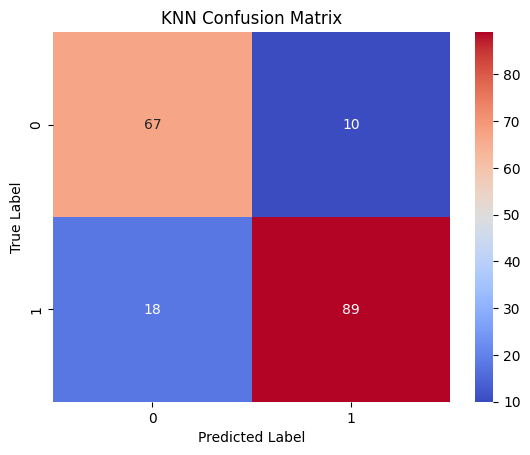

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best parameters for Decision Tree: {'class_weight': None, 'max_depth': 7, 'min_samples_leaf': 10}
Best cross-validated score for Decision Tree: 0.8351504985555864
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        77
           1       0.95      0.81      0.87       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.88      0.86      0.87       184

Decision Tree Confusion Matrix:


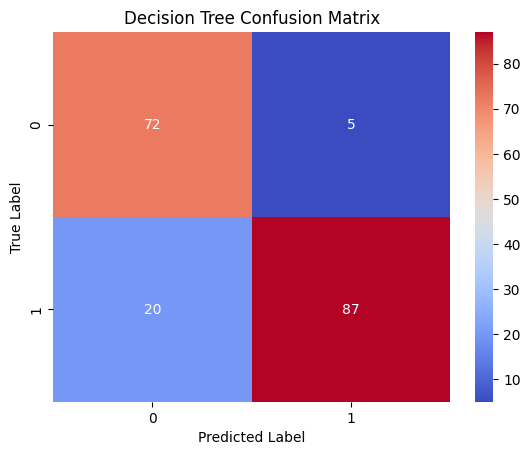

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Загрузка данных
df = pd.read_csv('./heart.csv')

# Преобразование категориальных признаков в числовые
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

df['HeartDisease'] = df['HeartDisease'].astype(int)

# Кодирование категориальных признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Разделение данных на признаки и целевую переменную
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование данных
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Обучение KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:")
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='coolwarm')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Подбор гиперпараметров для дерева решений
tree_params = {
    'max_depth': list(range(3, 11)),
    'min_samples_leaf': list(range(3, 11)),
    'class_weight': [None, 'balanced']
}

locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=42),
                                  tree_params,
                                  verbose=True, n_jobs=-1, cv=5,
                                  scoring='accuracy')

locally_best_tree.fit(X_train, y_train)

print("Best parameters for Decision Tree:", locally_best_tree.best_params_)
print("Best cross-validated score for Decision Tree:", locally_best_tree.best_score_)

best_tree = locally_best_tree.best_estimator_
y_pred_tree = best_tree.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))
print("Decision Tree Confusion Matrix:")
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='coolwarm')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Распределение целевой переменной:
HeartDisease
1    508
0    410
Name: count, dtype: int64


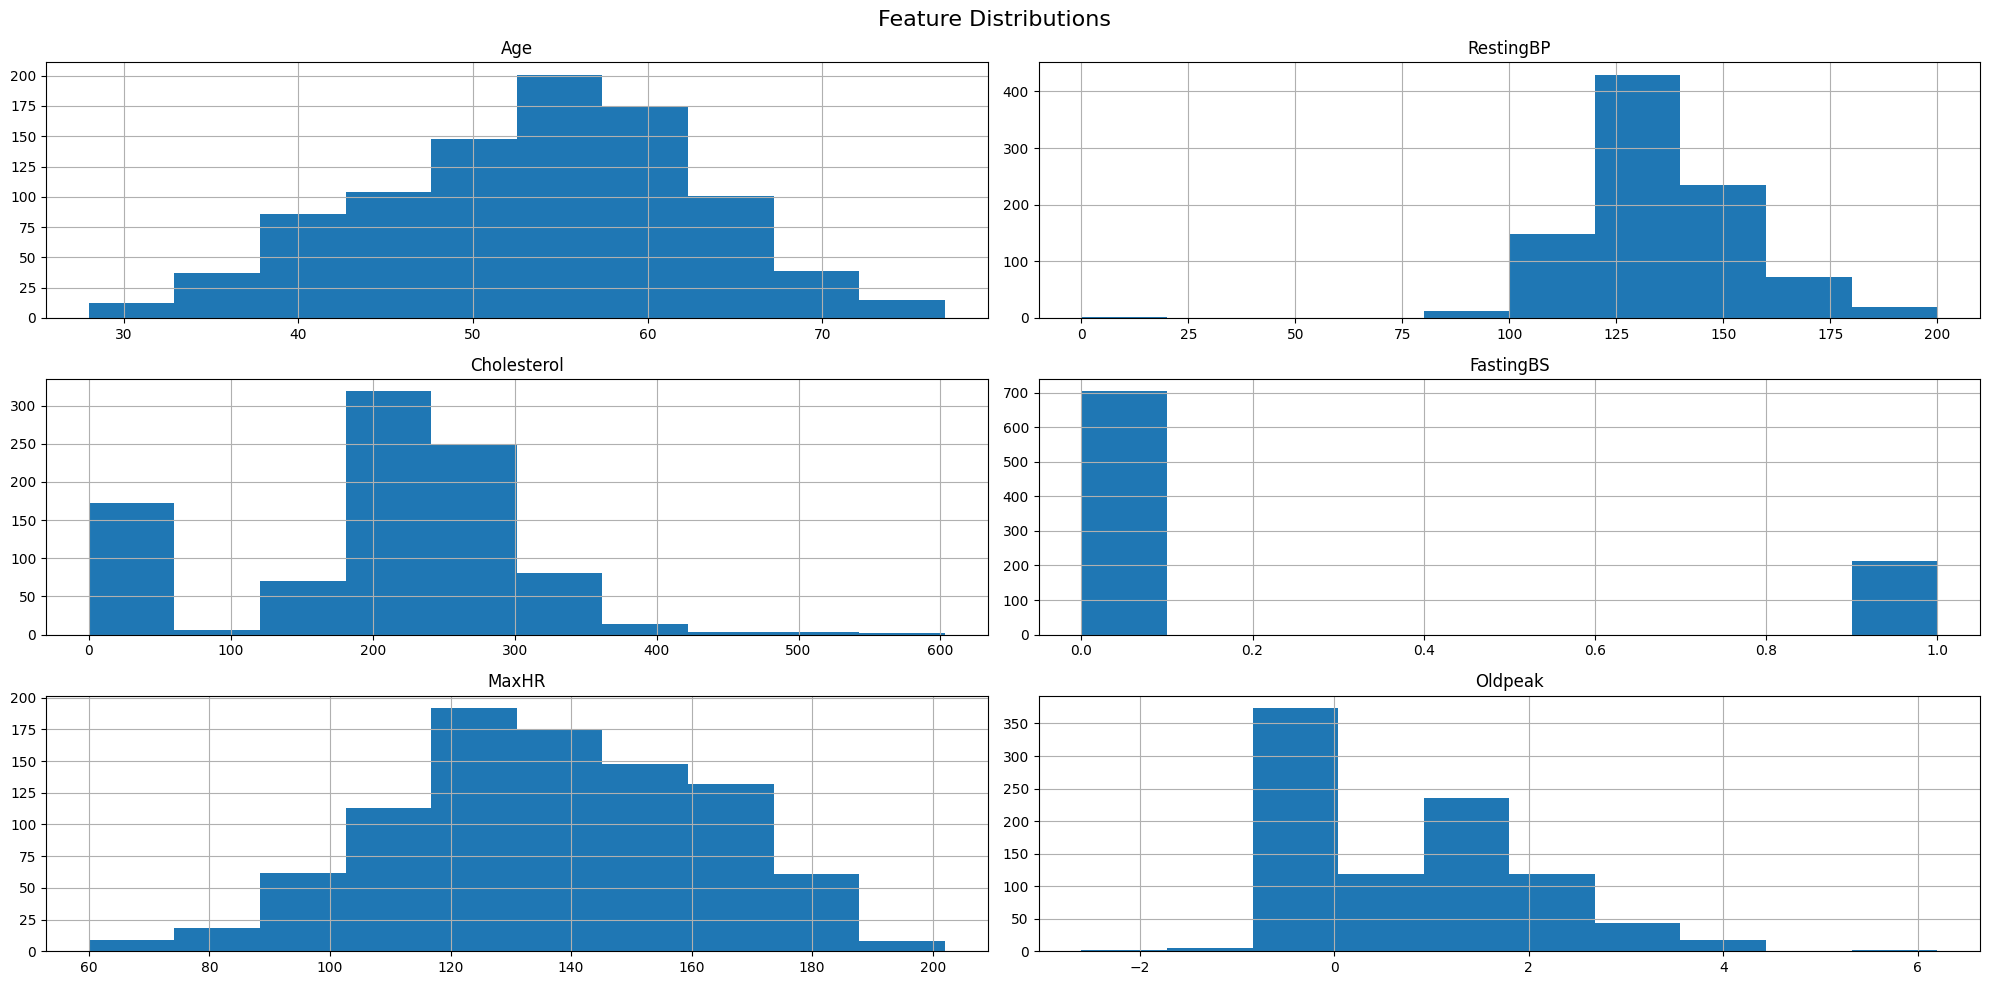


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

KNN Confusion Matrix:


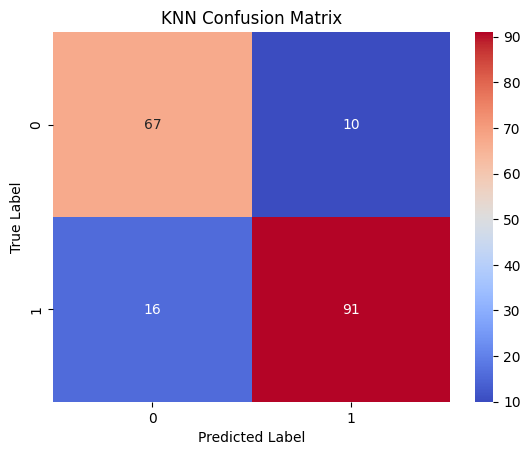


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        77
           1       0.92      0.82      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

Decision Tree Confusion Matrix:


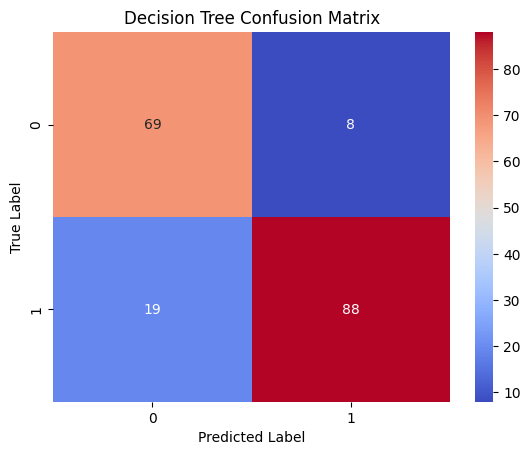


Сравнительный анализ моделей:
KNN Accuracy: 0.86
Decision Tree Accuracy: 0.85


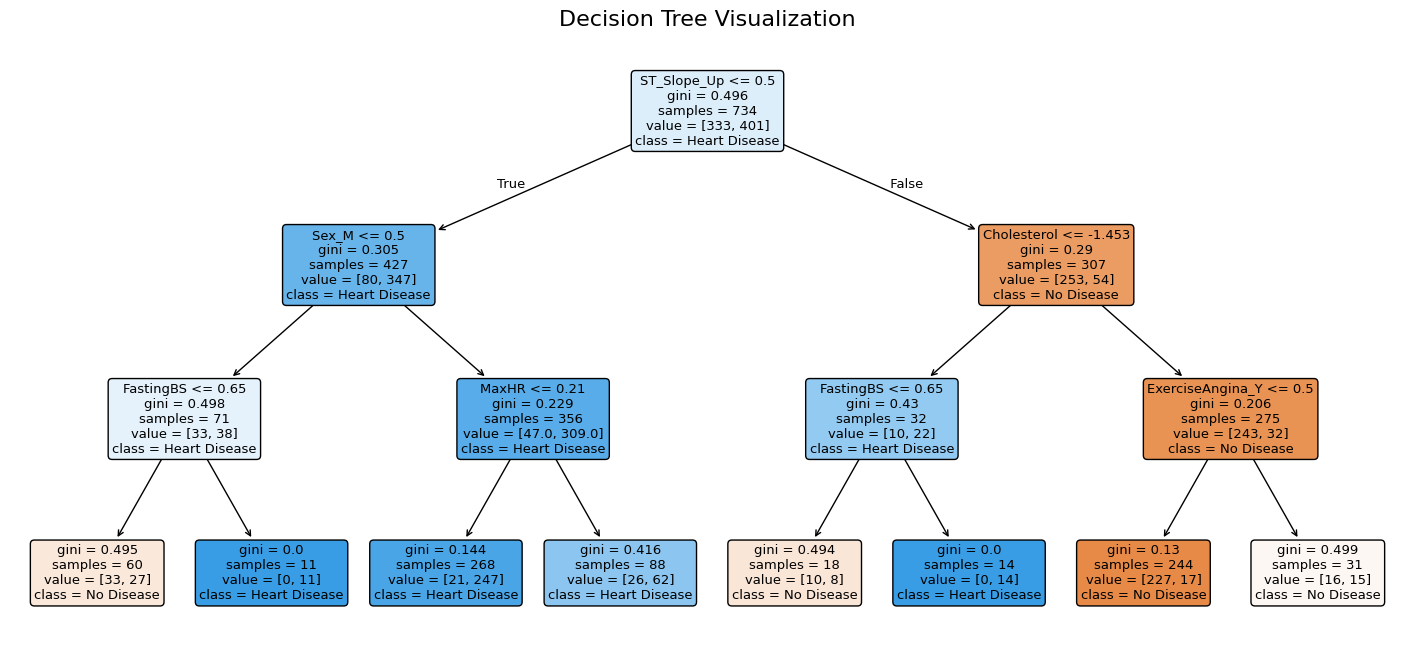

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

# Загрузка данных
df = pd.read_csv('heart.csv')

# Преобразование категориальных признаков в числовые
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

df['HeartDisease'] = df['HeartDisease'].astype(int)

# Кодирование категориальных признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

print("\nРаспределение целевой переменной:")
print(df['HeartDisease'].value_counts())

df.drop('HeartDisease', axis=1).hist(figsize=(20, 10))
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

# Разделение данных на признаки и целевую переменную
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование данных
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Обучение KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Обучение Decision Tree
dt_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:")
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='coolwarm')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='coolwarm')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

knn_accuracy = (y_pred_knn == y_test).mean()
dt_accuracy = (y_pred_dt == y_test).mean()

print("\nСравнительный анализ моделей:")
print(f"KNN Accuracy: {knn_accuracy:.2f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

feature_names = (numeric_features + 
                 list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)))

plt.figure(figsize=(18, 8))
plot_tree(dt_model, filled=True, rounded=True, feature_names=feature_names, class_names=["No Disease", "Heart Disease"])
plt.title('Decision Tree Visualization', fontsize=16)
plt.show()


Feature Statistics:
Age: Mean = 53.51, Mode = 54
Sex: Mean = 0.79, Mode = 1
ChestPainType: Mean = 0.78, Mode = 0
RestingBP: Mean = 132.40, Mode = 120
Cholesterol: Mean = 198.80, Mode = 0
FastingBS: Mean = 0.23, Mode = 0
RestingECG: Mean = 0.24, Mode = 0.0
MaxHR: Mean = 136.81, Mode = 150
ExerciseAngina: Mean = 0.40, Mode = 0
Oldpeak: Mean = 0.89, Mode = 0.0
ST_Slope: Mean = 0.46, Mode = 0.0


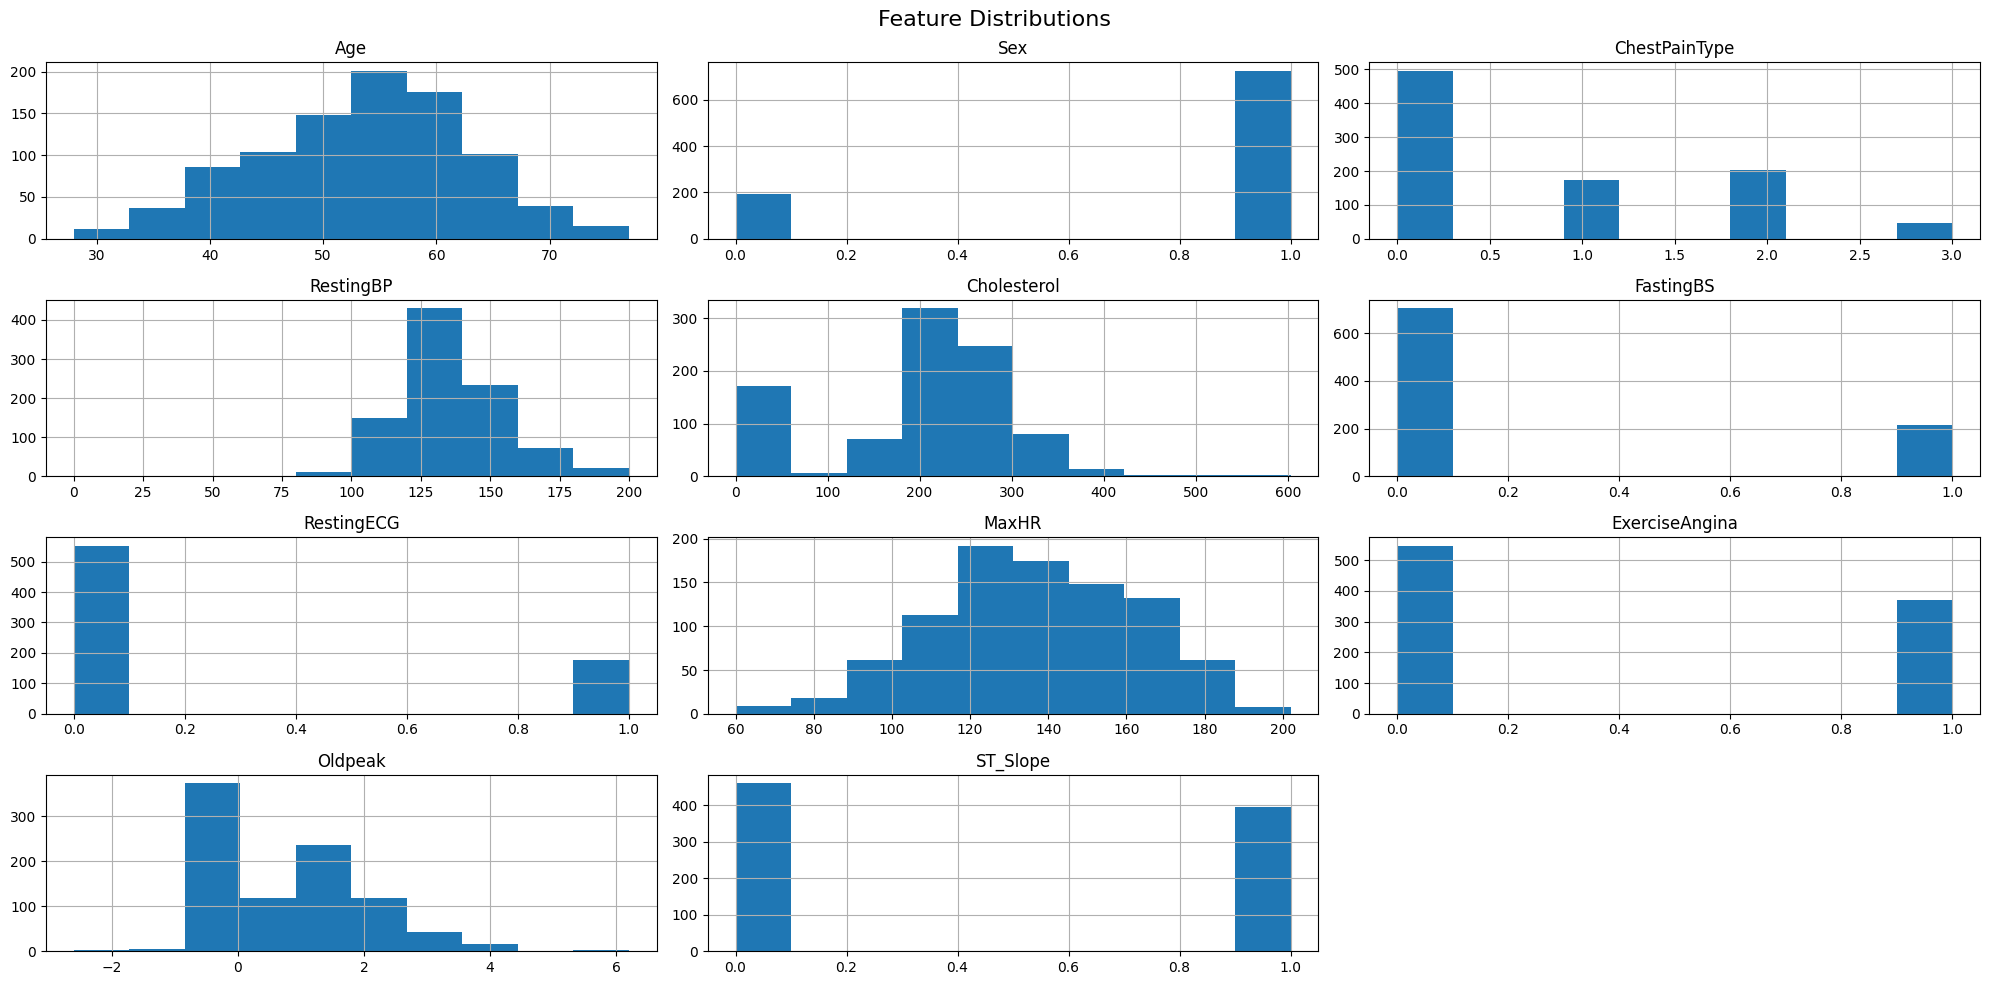


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        77
           1       0.87      0.79      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.81       184

KNN Confusion Matrix:


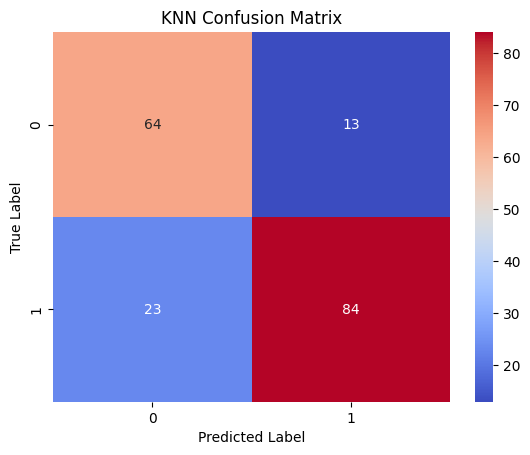


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        77
           1       0.92      0.82      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

Decision Tree Confusion Matrix:


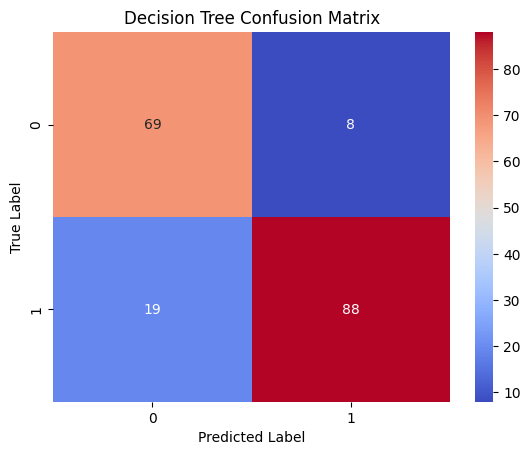


Сравнительный анализ моделей:
KNN Accuracy: 0.80
Decision Tree Accuracy: 0.85


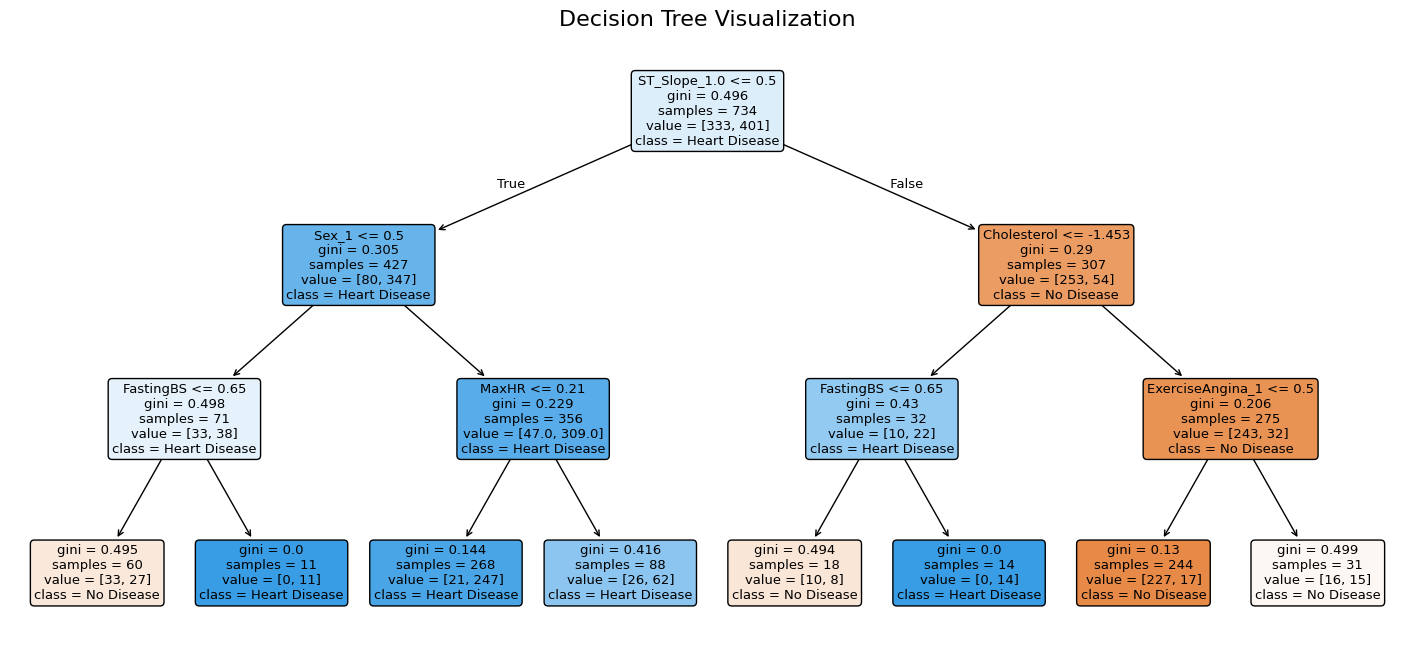

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Загрузка данных
df = pd.read_csv('heart.csv')

# Преобразование категориальных признаков в числовые
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

df['HeartDisease'] = df['HeartDisease'].astype(int)
df['Sex'] = df['Sex'].astype(str).map({'M': 1, 'F': 0})
df['ST_Slope'] = df['ST_Slope'].astype(str).map({'Up': 1, 'Flat': 0})
df['ExerciseAngina'] = df['ExerciseAngina'].astype(str).map({'Y': 1, 'N': 0})
df['RestingECG'] = df['RestingECG'].astype(str).map({'ST': 1, 'Normal': 0})
label_encoder = LabelEncoder()
df['ChestPainType'] = label_encoder.fit_transform(df['ChestPainType'])
# Кодирование категориальных признаков
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numeric_features),
#         ('cat', OneHotEncoder(drop='first'), categorical_features)
#     ]
# )

print("Feature Statistics:")
for col in df.columns:
    if col != 'HeartDisease':
        print(f"{col}: Mean = {df[col].mean():.2f}, Mode = {df[col].mode()[0]}")

df.drop('HeartDisease', axis=1).hist(figsize=(20, 10))
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

# Разделение данных на признаки и целевую переменную
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование данных
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Обучение KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Обучение дерева решений
dt_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:")
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='coolwarm')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='coolwarm')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

knn_accuracy = (y_pred_knn == y_test).mean()
dt_accuracy = (y_pred_dt == y_test).mean()

print("\nСравнительный анализ моделей:")
print(f"KNN Accuracy: {knn_accuracy:.2f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

feature_names = (numeric_features + 
                 list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)))

plt.figure(figsize=(18, 8))
plot_tree(dt_model, filled=True, rounded=True, feature_names=feature_names, class_names=["No Disease", "Heart Disease"])
plt.title('Decision Tree Visualization', fontsize=16)
plt.show()



Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

Decision Tree Confusion Matrix:
[[67 10]
 [17 90]]


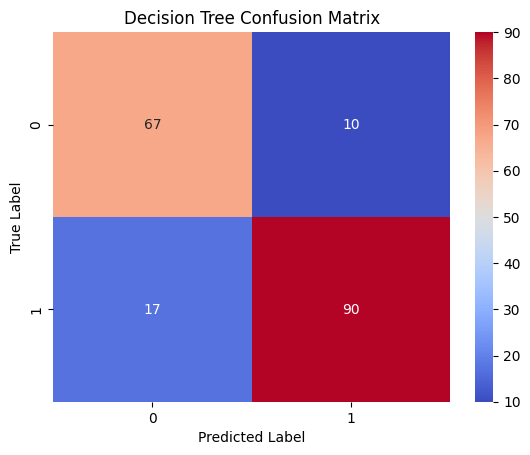


Comparing Model Accuracies:
KNN Accuracy: 0.8586956521739131
Decision Tree Accuracy: 0.8532608695652174


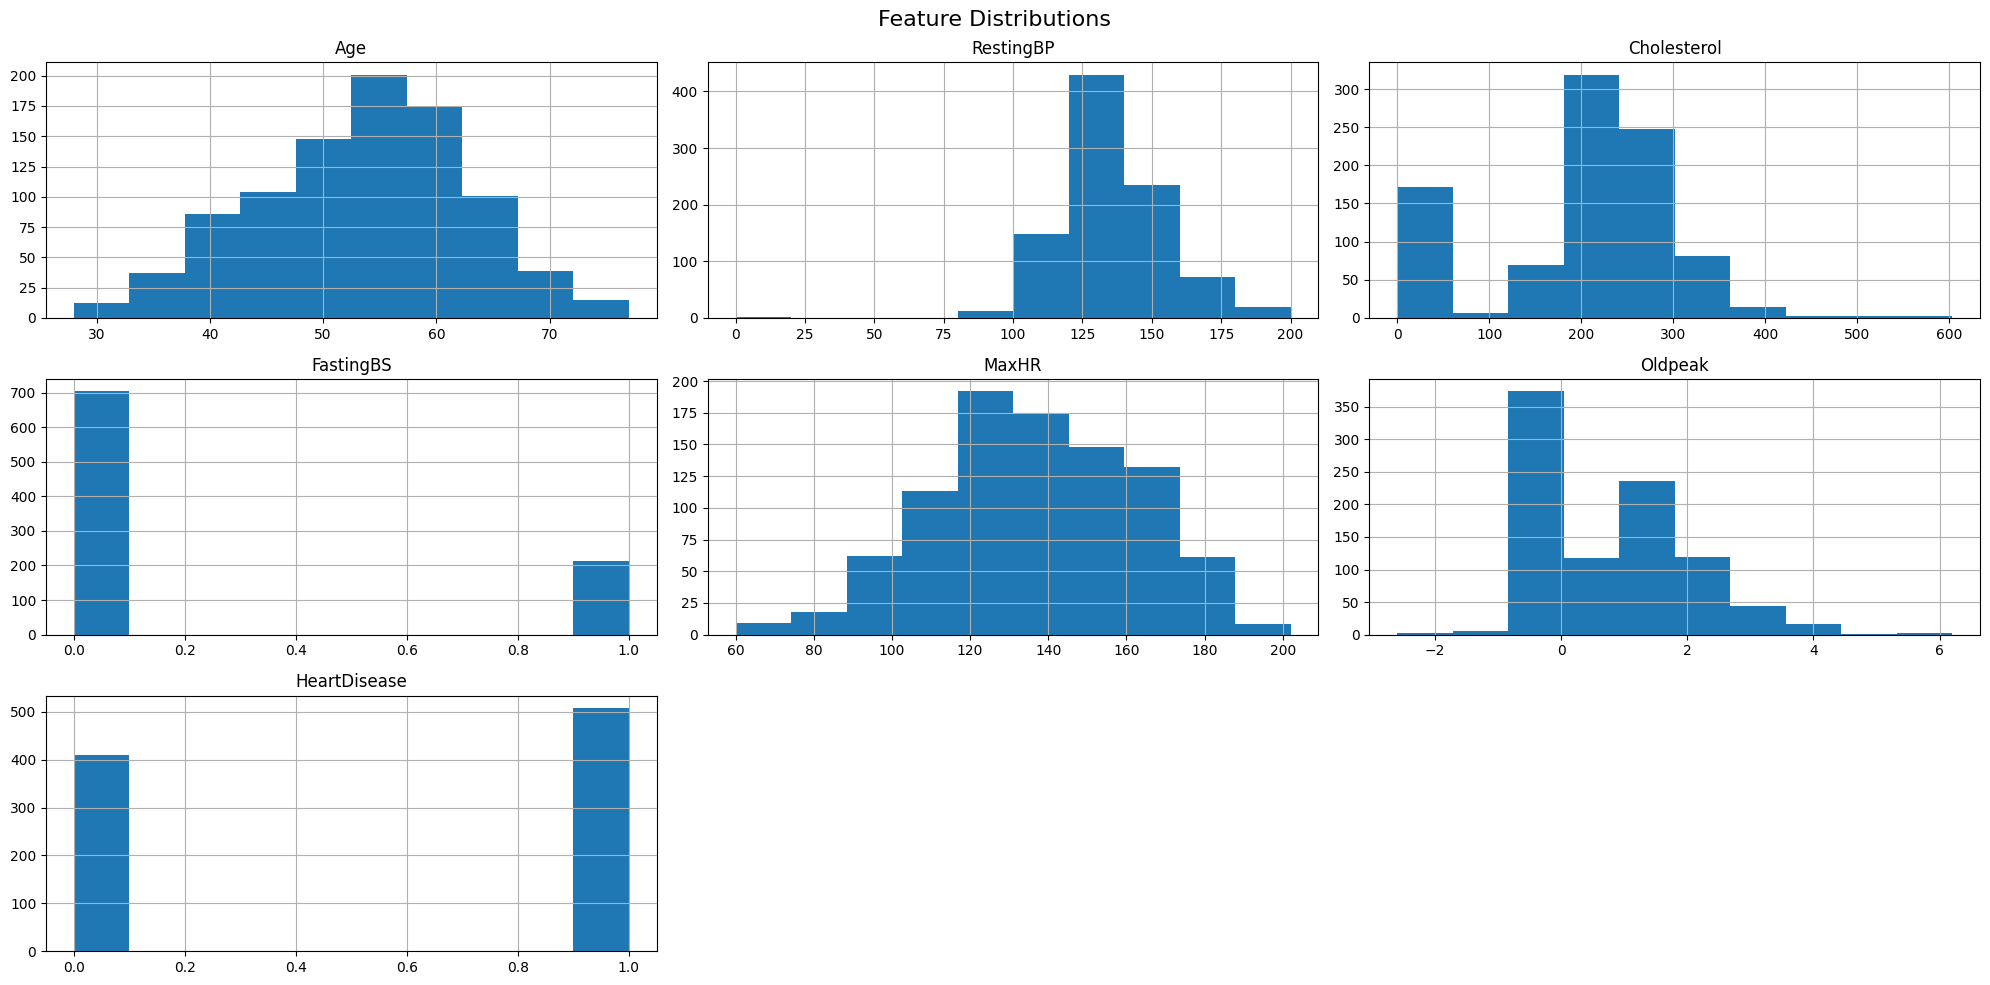

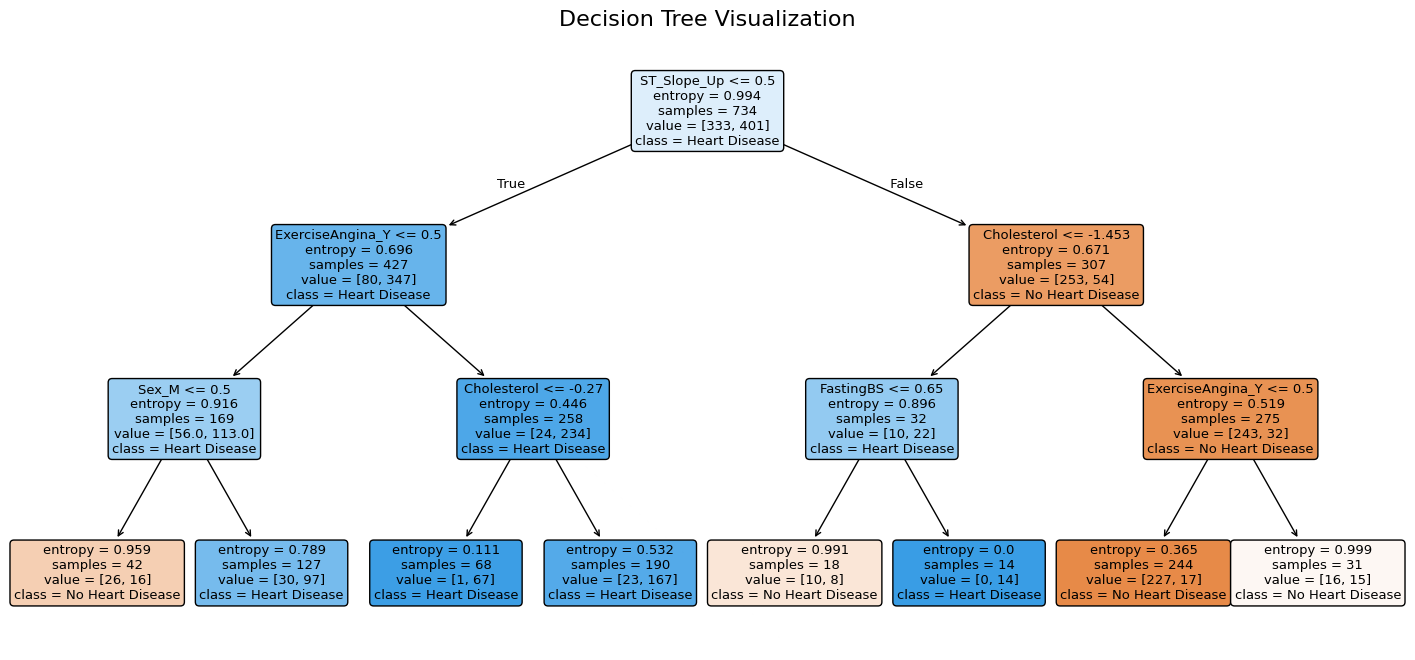

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Загружаем данные
df = pd.read_csv('heart.csv')

# Обрабатываем категориальные переменные (например, ChestPainType)
categorical_columns = ['ChestPainType', 'Sex', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Разделяем на признаки и целевую переменную
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Создаём преобразование для категориальных признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_columns),
        ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns)
    ])

# Модели в пайплайне
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('dt', DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42, criterion="entropy"))
])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем и оцениваем KNN
pipeline_knn.fit(X_train, y_train)
y_pred_knn = pipeline_knn.predict(X_test)

# Обучаем и оцениваем Decision Tree
pipeline_dt.fit(X_train, y_train)
y_pred_dt = pipeline_dt.predict(X_test)

# Выводим отчёты и метрики для Decision Tree
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

# Визуализируем Confusion Matrix для Decision Tree
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='coolwarm')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Сравнение точности моделей
print("\nComparing Model Accuracies:")
print("KNN Accuracy:", (y_pred_knn == y_test).mean())
print("Decision Tree Accuracy:", (y_pred_dt == y_test).mean())

# Визуализируем распределение признаков
df.hist(figsize=(20, 10))
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

preprocessor = pipeline_dt.named_steps['preprocessor']
encoder = preprocessor.transformers_[0][1]  # Получаем OneHotEncoder
encoder.fit(X_train[categorical_columns])  # Обучаем на тренировочных данных

encoded_columns = encoder.get_feature_names_out(categorical_columns)  # Имена новых признаков
all_columns = list(encoded_columns) + list(X.select_dtypes(include=['int64', 'float64']).columns)

# Визуализируем дерево решений
plt.figure(1, figsize=(18, 8))
plot_tree(pipeline_dt.named_steps['dt'], filled=True, rounded=True, feature_names=all_columns, class_names=["No Heart Disease", "Heart Disease"])
plt.title('Decision Tree Visualization', fontsize=16)
plt.show()
